In [1]:
probe_mapper = {'NP34_B2_0': 'P1-S1-P1',
                'NP34_B3_0': 'P1-S2-P1',
                'NP35_B2_0': 'P2-S1-P1',
                'NP66_B1_0': 'P3-S1-P1',
                'NP66_B1_1': 'P3-S1-P2',
                'NP66_B2_0': 'P3-S2-P1',
                'NP66_B2_1': 'P3-S2-P2',
                'NP86_B1_0': 'P4-S1-P1',
                'NP86_B1_1': 'P4-S1-P2',}

blk_mapper = {'NP34_B2': 'P1-S1',
                'NP34_B3': 'P1-S2',
                'NP35_B2': 'P2-S1',
                'NP86_B1': 'P4-S1',
                'NP66_B1': 'P3-S1',
                'NP66_B2': 'P3-S2',}


import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 6})#, 'font.sans-serif': 'Arial'})
plt.rcParams.update({'font.sans-serif':'Arial'})
import matplotlib as mpl
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.right'] = False
plt.rcParams['svg.fonttype'] = 'none'
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42 
import matplotlib.pyplot as plt
source_path = './source_data/FIG1/'

[Text(0.5, 0, 'Time (s)'),
 Text(0, 0.5, 'Avg. LFP (uV)'),
 (134.0, 139.5),

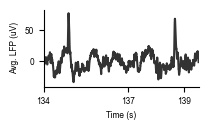

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# ---- LOAD ----
data = np.load(f"{source_path}/sample_ieds_lfp_vars.npz", allow_pickle=True)

lfp = data["lfp"]
chan_depth = data["chan_depth"]
fs_lfp = data["fs_lfp"].item()
t_lims = data["t_lims"]

# ---- RECOMPUTE DERIVED VARIABLES ----
samp_lims = (t_lims * fs_lfp).astype(int)
t_ar = np.linspace(
    t_lims[0],
    t_lims[1],
    np.diff(samp_lims).item()
)

# ---- PLOT ----
fig, ax = plt.subplots(figsize=(2, 1))

ax.plot(
    t_ar,
    lfp[samp_lims[0]:samp_lims[1], chan_depth > 0].mean(1),
    color='k',
    alpha=0.8
)

ax.set(
    xlabel="Time (s)",
    ylabel="Avg. LFP (uV)",
    xlim=[134,139.5],
    xticks=[134,137,139],
)

# plt.savefig(
#     "./current_composite_figure/sample_ieds_in_avg_lfp.svg",
#     dpi=300,
#     bbox_inches="tight"
# )


/var/folders/cl/sjgtx3y51792n2h_w3pck2q80000gn/T/ipykernel_12690/2722445832.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns


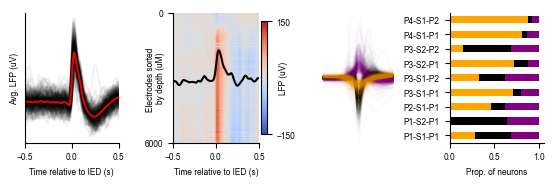

In [3]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
from scipy.stats import sem
from scipy.ndimage import gaussian_filter1d

fig, axs = plt.subplots(
    1, 4,
    figsize=(6.7, 1.69),  # 138 × 43 mm
    gridspec_kw=dict(wspace=0.6),width_ratios=[1,1,0.8,1]
)

# ------------------------------------------------------------
# PANEL 1 — ALL IEDS (IDENTICAL)
# ------------------------------------------------------------
d = np.load(f"{source_path}/all_ieds_sample_vars.npz", allow_pickle=True)
ieds_cur, chan_depth, t_ar = d["ieds_cur"], d["chan_depth"], d["t_ar"]

ieds_avg = ieds_cur[:, :, chan_depth > 0].mean(-1)
axs[0].plot(t_ar, ieds_avg.T, color='k', alpha=0.05)

mean_ied = ieds_avg.mean(0)
sem_ied  = sem(ieds_avg, axis=0)

axs[0].plot(t_ar, mean_ied, color='r', lw=1.5, alpha=0.9)
axs[0].fill_between(
    t_ar,
    mean_ied - 2*sem_ied,
    mean_ied + 2*sem_ied,
    color='r', alpha=0.2
)

axs[0].set(
    yticks=[],
    ylabel='Avg. LFP (uV)',
    xticks=[-0.5,0,0.5],
    xlim=[-0.5,0.5],
    xlabel='Time relative to IED (s)'
)
#np.savez('./nn_source/panel1c',ieds=ieds_avg,mean_ied=mean_ied)
# ------------------------------------------------------------
# PANEL 2 — IED RASTER (IDENTICAL)
# ------------------------------------------------------------
d = np.load(f"{source_path}ied_raster_sample_vars.npz", allow_pickle=True)
ieds_tr, chan_order = d["ieds_tr"], d["chan_order"]
chan_depth, depth_sort = d["chan_depth"], d["depth_sort"]

t_ar = np.linspace(-0.5,0.5,ieds_tr.shape[1])

im = axs[1].pcolormesh(
    t_ar,
    depth_sort,
    ieds_tr[4,:,chan_order],
    cmap='coolwarm',
    vmin=-150, vmax=150,
    rasterized=True
)

overlay = gaussian_filter1d(
    -1 * ieds_tr[3][:, chan_depth > 0].mean(1) * 20 + 3000,
    sigma=4
)
axs[1].plot(t_ar, overlay, color='k')

axs[1].set(
    yticks=[0,6000],
    ylim=[0,6000],
    xticks=[-0.5,0,0.5],
    xlabel='Time relative to IED (s)'
)
axs[1].set_ylabel('Electrodes sorted \nby depth (uM)', labelpad=-15)
axs[1].invert_yaxis()
#sns.despine(ax=axs[1],right=False,top=False)
plt.colorbar(
    im, ax=axs[1],
    fraction=0.06, pad=0.02,
    ticks=[-150,150]
).set_label('LFP (uV)', labelpad=-12)

# ------------------------------------------------------------
# PANEL 3 — WAVEFORM TYPES (IDENTICAL)
# ------------------------------------------------------------
d = np.load(f"{source_path}/waveform_types_vars.npz", allow_pickle=True)
waveforms, wv_types = d["waveforms"], d["wv_types"]
cols = ['k','purple','orange']

for i, wv in enumerate(np.unique(wv_types)):
    axs[2].plot(
        waveforms[wv_types==wv].T[10:50],
        color=cols[i], alpha=0.02
    )

axs[2].set(ylim=[-5000,5000], yticks=[], xticks=[])
sns.despine(ax=axs[2], left=True, bottom=True)

# ------------------------------------------------------------
# PANEL 4 — BARH (IDENTICAL)
# ------------------------------------------------------------
d_wv_bar = pd.read_csv(f"{source_path}/wv_types_barh_df.csv", index_col=0)
d_wv_bar = d_wv_bar.sort_values(by=d_wv_bar.columns[0])
d_wv_bar.to_csv('./statistical_source/FIG1/panel1g.csv')
y_labs = [probe_mapper[b] for b in d_wv_bar.Probe]

d_wv_bar.plot(
    ax=axs[3],
    kind='barh',
    stacked=True,
    color=np.array(cols)[[-1,0,1]],
    legend=None
)

axs[3].set(
    yticklabels=y_labs,
    xlabel='Prop. of neurons'
)

# ------------------------------------------------------------
# plt.savefig(
#     "./current_composite_figure/combined_1x4_exact.svg",
#     dpi=800, bbox_inches='tight'
# )
plt.show()


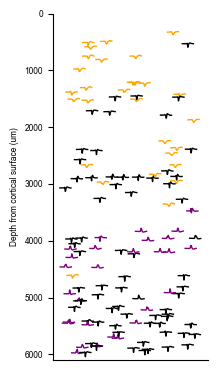

In [4]:
# -----------------------------
# --- LOAD VARIABLES AND PLOT ---
# -----------------------------
from scipy.stats import zscore
np.random.seed(0)
data = np.load(f"{source_path}/NP66_B2_1_vars.npz", allow_pickle=True)
wvs = data['wvs']
wv_cats = data['wv_cats']
depths = data['depths']
cols = data['cols']
cats = data['cats']

# Plot
fig, ax = plt.subplots(figsize=(2,4.5))
for wv, wv_cat, depth in zip(wvs, wv_cats, depths):
    wv = -1*15*zscore(wv) + depth
    center = np.random.randint(0,700)
    x = np.arange(center, center+wv.shape[0], 1)
    ax.plot(x, wv, color=cols[cats == wv_cat].item(), linewidth=1)

ax.set(ylabel='Depth from cortical surface (um)', ylim=[0,6100])
ax.set(xticks=[])
ax.invert_yaxis()
#plt.savefig('./current_composite_figure/NP66_B2_1.jpg', bbox_inches='tight', dpi=300)
plt.show()

In [5]:
data = np.load(f'{source_path}/NP66_rasters.npz', allow_pickle=True)
all_psths = data['all_psths']
all_errs = data['all_errs']
all_spks = data['all_spks']
spk_times = data['spk_times']

here
here


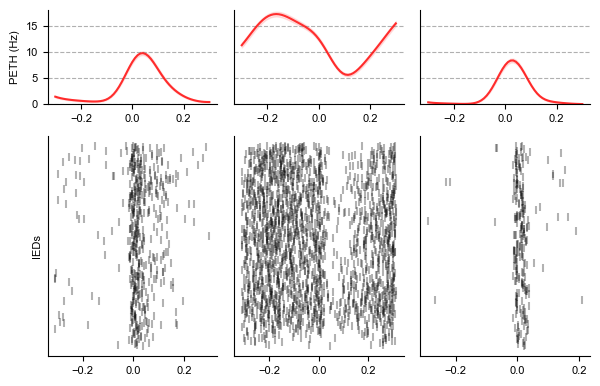

In [6]:
from ecog_utils import np_tools,erp_util
from scipy.stats import sem
fig,axs = plt.subplots(2,3,figsize=(7,4.5),gridspec_kw={'wspace':0.1},height_ratios=[0.3,0.7])
for ii,psth,er,spks in zip(range(3),all_psths,all_errs,all_spks):
    ax_p = axs[0,ii]
    ax_r = axs[1,ii]
    
    ax_p.plot(np.linspace(-0.3,0.3,psth.shape[0]),psth,color='r',alpha=0.8)
    ax_p.fill_between(np.linspace(-0.3,0.3,psth.shape[0]),psth - er,psth + er,alpha=0.1,color='r')
    ax_p.set(ylim=[0,18])
    ax_p.grid(True, axis='y', linestyle='--')

    ax_r = np_tools.plot_raster_to_ax(ax_r,spks,
                                        spk_times,offset=1,t_ar=[-.31,.31],add_psth=False,
                                        psth_fs=100,only_spk_trs=True,scale_psth=4)


    if(not ii==0):
        print('here')
        ax_r.set(ylabel='')
        ax_p.set(ylabel='',yticklabels=[])
        ax_p.yaxis.set_tick_params(size=0)
        ax_p.yaxis.grid(True)
    else:
        ax_r.set(ylabel='IEDs')
        ax_p.set(ylabel='PETH (Hz)')
    if(i == 1 and ii == 1):
        ax_r.set(xlabel='Time relative to IED onset (s)')

#plt.savefig(f'./current_composite_figure/ied_rasters_NP66_B1.jpg',bbox_inches='tight',dpi=200)

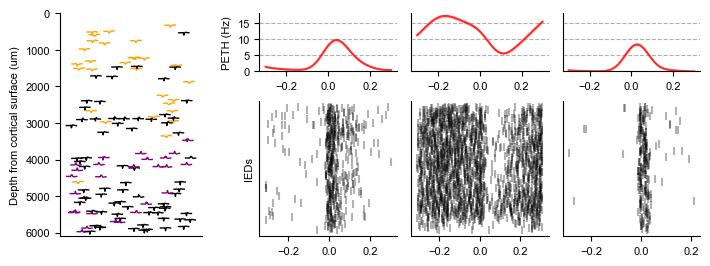

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import zscore
from matplotlib.gridspec import GridSpec
from ecog_utils import np_tools

# ---- Load waveform data ----
np.random.seed(0)
data = np.load(f'{source_path}/NP66_B2_1_vars.npz', allow_pickle=True)
wvs, wv_cats, depths, cols, cats = data['wvs'], data['wv_cats'], data['depths'], data['cols'], data['cats']

# ---- Load PSTH/raster data ----
# all_psths, all_errs, all_spks, spk_times must be loaded previously

# ---- Create figure with 1x2 panels ----
fig = plt.figure(figsize=(7, 2.45))  # width x height in inches
fig.subplots_adjust(left=0.065, right=1, top=0.98, bottom=0.07)
gs = GridSpec(1, 2, width_ratios=[1,3], wspace=0.3)

# ---- PANEL 1: Waveforms ----
ax0 = fig.add_subplot(gs[0,0])
for wv, wv_cat, depth in zip(wvs, wv_cats, depths):
    wv = -1*15*zscore(wv) + depth
    center = np.random.randint(0,700)
    x = np.arange(center, center+wv.shape[0])
    ax0.plot(x, wv, color=cols[cats == wv_cat].item(), linewidth=1)
ax0.set(ylabel='Depth from cortical surface (um)', ylim=[0,6100])
ax0.set(xticks=[])
ax0.invert_yaxis()

# ---- PANEL 2: PSTH + Raster (2x3) ----
data = np.load(f'{source_path}/NP66_rasters.npz', allow_pickle=True)
all_psths = data['all_psths']
all_errs = data['all_errs']
all_spks = data['all_spks']
spk_times = data['spk_times']
gs2 = GridSpec(2,3, figure=fig, left=0.35, right=0.98, wspace=0.1, hspace=0.3, height_ratios=[0.3,0.7])
for ii, (psth, er, spks) in enumerate(zip(all_psths, all_errs, all_spks)):
    ax_p = fig.add_subplot(gs2[0, ii])
    ax_r = fig.add_subplot(gs2[1, ii])

    # PSTH
    t_psth = np.linspace(-0.3, 0.3, psth.shape[0])
    ax_p.plot(t_psth, psth, color='r', alpha=0.8)
    ax_p.fill_between(t_psth, psth-er, psth+er, color='r', alpha=0.1)
    ax_p.set(ylim=[0,18],yticks=[0,5,10,15])
    ax_p.grid(True, axis='y', linestyle='--')
    if ii != 0:
        ax_p.set(ylabel='', yticklabels=[])
        ax_p.yaxis.set_tick_params(size=0)
    else:
        ax_p.set(ylabel='PETH (Hz)')

    # Raster
    ax_r = np_tools.plot_raster_to_ax(ax_r, spks, spk_times, offset=1,
                                      t_ar=[-0.31,0.31], add_psth=False,
                                      psth_fs=100, only_spk_trs=True, scale_psth=4)
    if ii != 0:
        ax_r.set(ylabel='')
    else:
        ax_r.set(ylabel='IEDs')
    if ii == 1:
        pass
        #ax_r.set(xlabel='Time relative to IED onset (s)')

# ---- Save ----
# plt.savefig('./current_composite_figure/NP66_combined_1x2_aesthetic.svg', dpi=800, transparent=True)#bbox_inches='tight',
# plt.savefig('./current_composite_figure/NP66_combined_1x2_aesthetic.pdf', dpi=800, transparent=True)
# #plt.savefig('./current_composite_figure/NP66_combined_1x2_aesthetic_tight.pdf', dpi=800, transparent=True,bbox_inches='tight')

plt.show()


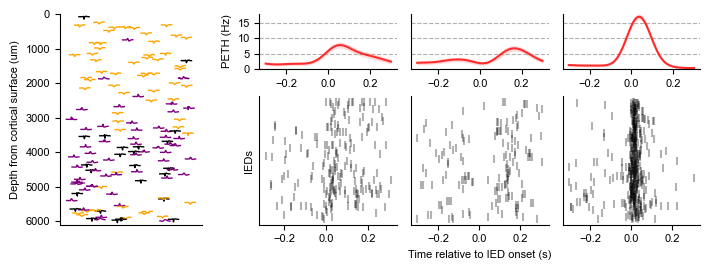

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import zscore
from matplotlib.gridspec import GridSpec
from ecog_utils import np_tools

# ---- Load waveform data ----
np.random.seed(0)
data = np.load(f'{source_path}/NP35_B2_0_vars.npz', allow_pickle=True)
wvs, wv_cats, depths, cols, cats = data['wvs'], data['wv_cats'], data['depths'], data['cols'], data['cats']

# ---- Load PSTH/raster data ----
# all_psths, all_errs, all_spks, spk_times must be loaded previously

# ---- Create figure with 1x2 panels ----
fig = plt.figure(figsize=(7, 2.45))  # width x height in inches
fig.subplots_adjust(left=0.065, right=1, top=0.98, bottom=0.12)
gs = GridSpec(1, 2, width_ratios=[1,3], wspace=0.3)

# ---- PANEL 1: Waveforms ----
ax0 = fig.add_subplot(gs[0,0])
for wv, wv_cat, depth in zip(wvs, wv_cats, depths):
    wv = -1*15*zscore(wv) + depth
    center = np.random.randint(0,700)
    x = np.arange(center, center+wv.shape[0])
    ax0.plot(x, wv, color=cols[cats == wv_cat].item(), linewidth=1)
ax0.set(ylabel='Depth from cortical surface (um)', ylim=[0,6100])
ax0.set(xticks=[])
ax0.invert_yaxis()

# ---- PANEL 2: PSTH + Raster (2x3) ----
data = np.load(f'{source_path}/NP35_rasters.npz', allow_pickle=True)
all_psths = data['all_psths']
all_errs = data['all_errs']
all_spks = data['all_spks']
spk_times = data['spk_times']
gs2 = GridSpec(2,3, figure=fig, left=0.35, right=0.98, wspace=0.1, hspace=0.3, height_ratios=[0.3,0.7])
for ii, (psth, er, spks) in enumerate(zip(all_psths, all_errs, all_spks)):
    ax_p = fig.add_subplot(gs2[0, ii])
    ax_r = fig.add_subplot(gs2[1, ii])

    # PSTH
    t_psth = np.linspace(-0.3, 0.3, psth.shape[0])
    ax_p.plot(t_psth, psth, color='r', alpha=0.8)
    ax_p.fill_between(t_psth, psth-er, psth+er, color='r', alpha=0.1)
    ax_p.set(ylim=[0,18],yticks=[0,5,10,15])
    ax_p.grid(True, axis='y', linestyle='--')
    if ii != 0:
        ax_p.set(ylabel='', yticklabels=[])
        ax_p.yaxis.set_tick_params(size=0)
    else:
        ax_p.set(ylabel='PETH (Hz)')

    # Raster
    ax_r = np_tools.plot_raster_to_ax(ax_r, spks, spk_times, offset=1,
                                      t_ar=[-0.31,0.31], add_psth=False,
                                      psth_fs=100, only_spk_trs=True, scale_psth=4)
    if ii != 0:
        ax_r.set(ylabel='')
    else:
        ax_r.set(ylabel='IEDs')
    if ii == 1:
        #pass
        ax_r.set(xlabel='Time relative to IED onset (s)')

# ---- Save ----
#plt.savefig('./current_composite_figure/NP35_combined_1x2_aesthetic.pdf', dpi=800, transparent=True)

plt.show()


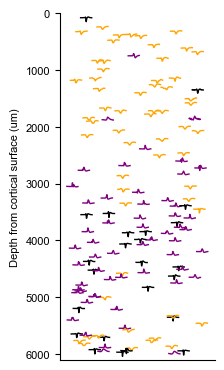

In [9]:
# -----------------------------
# --- LOAD VARIABLES AND PLOT ---
# -----------------------------
np.random.seed(0)

data = np.load(f'{source_path}/NP35_B2_0_vars.npz', allow_pickle=True)
wvs = data['wvs']
wv_cats = data['wv_cats']
depths = data['depths']
cols = data['cols']
cats = data['cats']

# Plot
fig, ax = plt.subplots(figsize=(2,4.5))
for wv, wv_cat, depth in zip(wvs, wv_cats, depths):
    wv = -1*15*zscore(wv) + depth
    center = np.random.randint(0,700)
    x = np.arange(center, center + wv.shape[0], 1)
    ax.plot(x, wv, color=cols[cats == wv_cat].item(), linewidth=1)

ax.set(ylabel='Depth from cortical surface (um)', ylim=[0,6100])
ax.set(xticks=[])
ax.invert_yaxis()
#plt.savefig('./current_composite_figure/NP35_B2_0.jpg', bbox_inches='tight', dpi=300)
plt.show()

In [10]:
data = np.load(f'{source_path}/NP35_rasters.npz', allow_pickle=True)
all_psths = data['all_psths']
all_errs = data['all_errs']
all_spks = data['all_spks']
spk_times = data['spk_times']

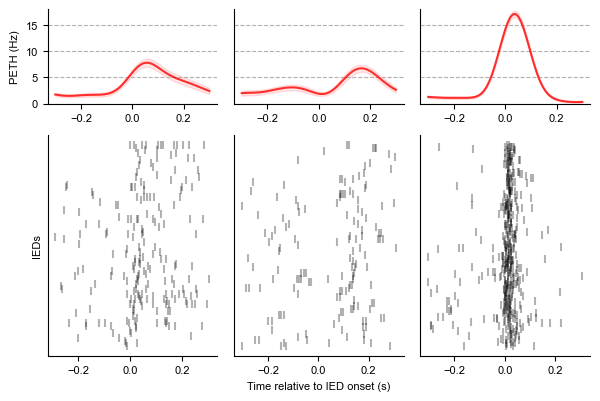

In [11]:
from ecog_utils import np_tools,erp_util
from scipy.stats import sem
fig,axs = plt.subplots(2,3,figsize=(7,4.5),gridspec_kw={'wspace':0.1},height_ratios=[0.3,0.7])
for ii,psth,er,spks in zip(range(3),all_psths,all_errs,all_spks):
    ax_p = axs[0,ii]
    ax_r = axs[1,ii]
    
    ax_p.plot(np.linspace(-0.3,0.3,psth.shape[0]),psth,color='r',alpha=0.8)
    ax_p.fill_between(np.linspace(-0.3,0.3,psth.shape[0]),psth - er,psth + er,alpha=0.1,color='r')
    ax_p.set(ylim=[0,18])
    ax_p.grid(True, axis='y', linestyle='--')

    ax_r = np_tools.plot_raster_to_ax(ax_r,spks,
                                        spk_times,offset=1,t_ar=[-.31,.31],add_psth=False,
                                        psth_fs=100,only_spk_trs=True,scale_psth=4)


    if(not ii==0):
        ax_r.set(ylabel='')
        ax_p.set(ylabel='',yticklabels=[])
        ax_p.yaxis.set_tick_params(size=0)
        ax_p.yaxis.grid(True)
    else:
        ax_r.set(ylabel='IEDs')
        ax_p.set(ylabel='PETH (Hz)')
    if(ii == 1):
        ax_r.set(xlabel='Time relative to IED onset (s)')

#plt.savefig(f'./current_composite_figure/ied_rasters_NP66_B1.jpg',bbox_inches='tight',dpi=200)